<a href="https://colab.research.google.com/github/salmahamdy/TeethDisease_Classification/blob/main/DentalImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:


img_height, img_width = 224, 224
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Teeth DataSet/Teeth_Dataset/Training",
    image_size=(224, 224),
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Teeth DataSet/Teeth_Dataset/Validation",
    image_size=(224, 224),
    batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Teeth DataSet/Teeth_Dataset/Testing",
    image_size=(224, 224),
    batch_size=batch_size
)
class_names = train_ds.class_names
print("Classes:", class_names)


Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Classes: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [4]:

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),

])

normalization_layer = tf.keras.layers.Rescaling(1./255)

def preprocess(image, label, training=False):
    if training:
        image = data_augmentation(image, training=True)
    image = normalization_layer(image)
    return image, label


train_ds = train_ds.map(lambda x, y: preprocess(x, y, training=True),
                        num_parallel_calls=tf.data.AUTOTUNE)

val_ds = val_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)



In [ ]:

def show_batch(dataset, class_names):
    for images, labels in dataset.take(1):
        plt.figure(figsize=(10, 10))
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(class_names[int(labels[i].numpy())])
            plt.axis("off")
        plt.show()

show_batch(train_ds, class_names)


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

cnn_model = Sequential()


cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))


cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))


cnn_model.add(Conv2D(128, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(128, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))


cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(7, activation='softmax'))  # 7 classes output


cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

cnn_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 10, 10, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,455 (1.99 MB)

 Trainable params: 520,455 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
32*6*6*32

36864

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.1678 - loss: 1.9377 - val_accuracy: 0.1751 - val_loss: 1.9332
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.1674 - loss: 1.9312 - val_accuracy: 0.1887 - val_loss: 1.9186
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.1750 - loss: 1.9232 - val_accuracy: 0.1877 - val_loss: 1.9406
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.1687 - loss: 1.9254 - val_accuracy: 0.2160 - val_loss: 1.8837
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.2050 - loss: 1.8685 - val_accuracy: 0.2763 - val_loss: 1.7922
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.2794 - loss: 1.7877 - val_accuracy: 0.3580 - val_loss: 1.6423
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.3560 - loss: 1.6376 - val_accuracy: 0.4251 - val_loss: 1.5113
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.4404 - loss: 1.4578 - val_accuracy: 0.4523

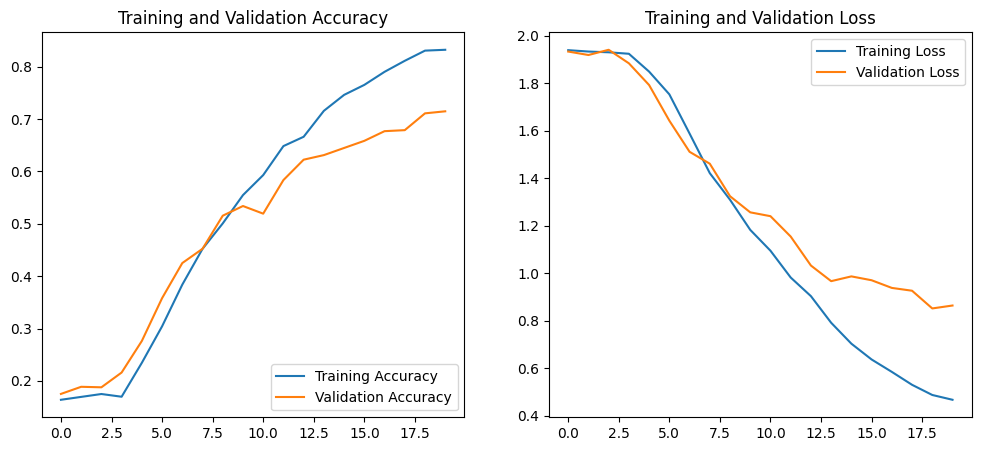

In [21]:

# --- Model Training ---
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

epochs = 20
history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# --- Plot Training History ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:


test_loss, test_acc = cnn_model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7584 - loss: 1.0585
Test Accuracy: 0.7480545043945312


In [11]:
cnn_model.save('/content/drive/MyDrive/Teeth DataSet/Teeth_Dataset/cnn_model.h5')